In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/train.csv')
pd.set_option('display.max_columns', None)
df.shape

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(100000, 28)

In [3]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


## Data Description

 - ID: Unique ID of the record
 - Customer_ID: Unique ID of the customer
 - Month: Month of the year
 - Name: The name of the person
 - Age: The age of the person
 - SSN: Social Security Number of the person
 - Occupation: The occupation of the person
 - Annual_Income: The Annual Income of the person
 - Monthly_Inhand_Salary: Monthly in-hand salary of the person
 - Num_Bank_Accounts: The number of bank accounts of the person
 - Num_Credit_Card: Number of credit cards the person is having
 - Interest_Rate: The interest rate on the credit card of the person
 - Num_of_Loan: The number of loans taken by the person from the bank
 - Type_of_Loan: The types of loans taken by the person from the bank
 - Delay_from_due_date: The average number of days delayed by the person from the date of payment
 - Num_of_Delayed_Payment: Number of payments delayed by the person
 - Changed_Credit_Card: The percentage change in the credit card limit of the person
 - Num_Credit_Inquiries: The number of credit card inquiries by the person
 - Credit_Mix: Classification of Credit Mix of the customer
 - Outstanding_Debt: The outstanding balance of the person
 - Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
 - Credit_History_Age: The age of the credit history of the person
 - Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
 - Total_EMI_per_month: The total EMI per month of the person
 - Amount_invested_monthly: The monthly amount invested by the person
 - Payment_Behaviour: The payment behaviour of the person
 - Monthly_Balance: The monthly balance left in the account of the person
 - Credit_Score: The credit score of the person

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
#df.drop(['ID', 'Customer_ID', 'SSN', 'Name'], axis=1, inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(53049, 28)

In [9]:
df['Occupation'].value_counts()

_______          3727
Lawyer           3558
Mechanic         3419
Doctor           3344
Teacher          3341
Entrepreneur     3326
Architect        3325
Engineer         3321
Media_Manager    3306
Accountant       3305
Scientist        3281
Developer        3279
Writer           3150
Musician         3136
Journalist       3124
Manager          3107
Name: Occupation, dtype: int64

In [10]:
df['Credit_Score'].value_counts()

Standard    27951
Poor        16516
Good         8582
Name: Credit_Score, dtype: int64

In [11]:
# separate the data by class
df_good = df[df['Credit_Score'] == 'Good']
df_standard = df[df['Credit_Score'] == 'Standard']
df_poor = df[df['Credit_Score'] == 'Poor']

# calculate undersampling ratios
undersampling_ratio_standard = len(df_good) / len(df_standard)
undersampling_ratio_poor = len(df_good) / len(df_poor)

# undersample the other classes
df_standard = df_standard.sample(frac=undersampling_ratio_standard, random_state=42)
df_poor = df_poor.sample(frac=undersampling_ratio_poor, random_state=42)

# combine the undersampled data with the "Good" class
df_undersampled = pd.concat([df_good, df_standard, df_poor], axis=0)

# shuffle the data
df_undersampled = df_undersampled.sample(frac=1, random_state=42)

In [12]:
df_undersampled['Credit_Score'].value_counts()

Poor        8582
Standard    8582
Good        8582
Name: Credit_Score, dtype: int64

In [13]:
df = df_undersampled

In [14]:
df.nunique()

ID                          25746
Customer_ID                 10015
Month                           8
Name                         8429
Age                           569
SSN                          9877
Occupation                     16
Annual_Income               11649
Monthly_Inhand_Salary       10321
Num_Bank_Accounts             339
Num_Credit_Card               514
Interest_Rate                 563
Num_of_Loan                   151
Type_of_Loan                 5732
Delay_from_due_date            73
Num_of_Delayed_Payment        274
Changed_Credit_Limit         3410
Num_Credit_Inquiries          395
Credit_Mix                      4
Outstanding_Debt            10080
Credit_Utilization_Ratio    25746
Credit_History_Age            404
Payment_of_Min_Amount           3
Total_EMI_per_month         11047
Amount_invested_monthly     24520
Payment_Behaviour               7
Monthly_Balance             25744
Credit_Score                    3
dtype: int64

### Clearly the ID corresponds to the primary key of the dataset and there are no duplicate entries present.

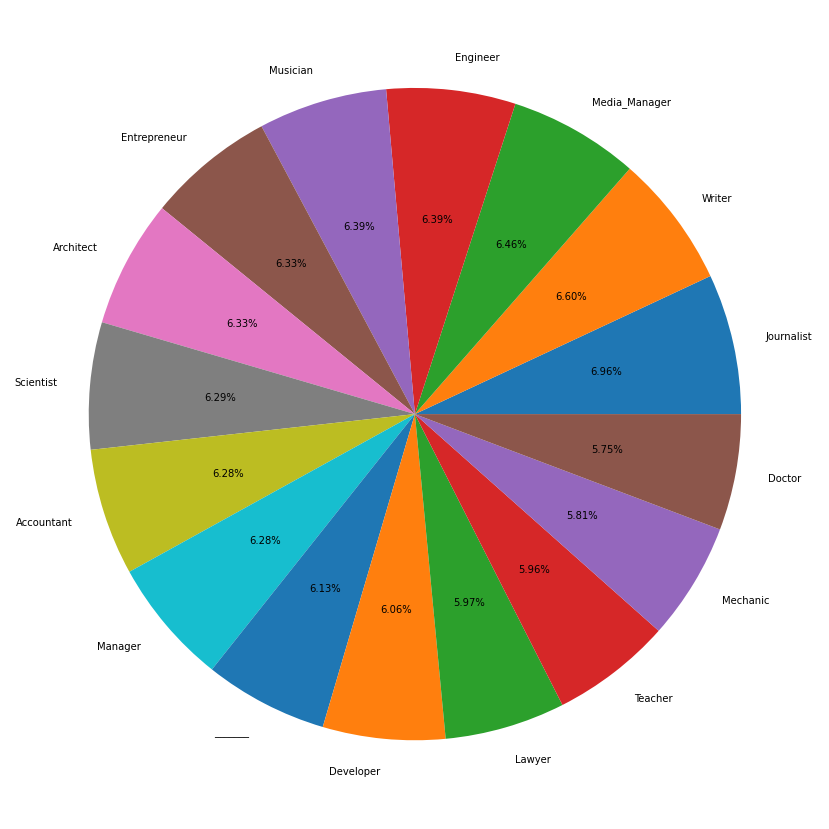

In [15]:
Occupation = df['Occupation'].value_counts().tolist()
labels = df['Occupation'].values.tolist()
labels = list(set(labels))
plt.figure(figsize = (15,15))
plt.pie(Occupation, labels = labels, autopct = '%1.2f%%')
plt.show()

Clearly the dataset is very evenly distributed with respect to the Occupation. Every occupation contributes to ~ 7% of the dataset. 

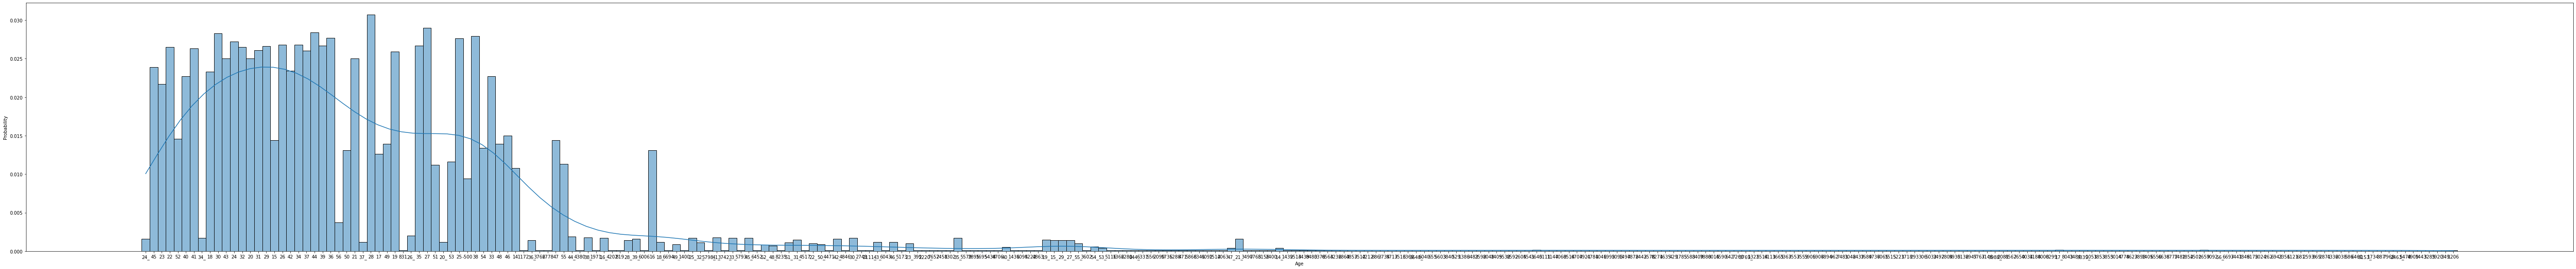

In [16]:
plt.figure(figsize = (100,10))
sns.histplot(data = df[:10000], x = 'Age', kde = True, stat = 'probability')
plt.show()

The distribution of the age is not normal. People mostly with age 20-45 use credit card.

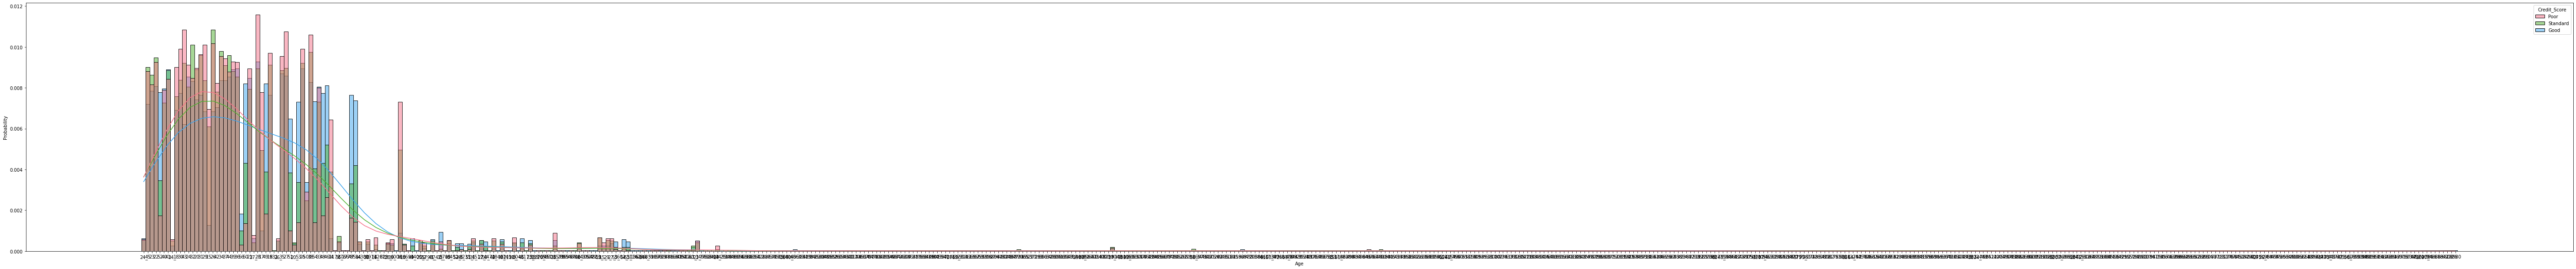

In [17]:
plt.figure(figsize = (100,10))
sns.histplot(data = df, x = 'Age', hue = 'Credit_Score', kde = True, stat = 'probability', palette = 'husl')
plt.show()

- The above distribution is pretty uniform with respect to every class

- The distribution of the amount invested monthly is also exponential with the peak being at 25. Also, there is also a pretty high population not investing at all.

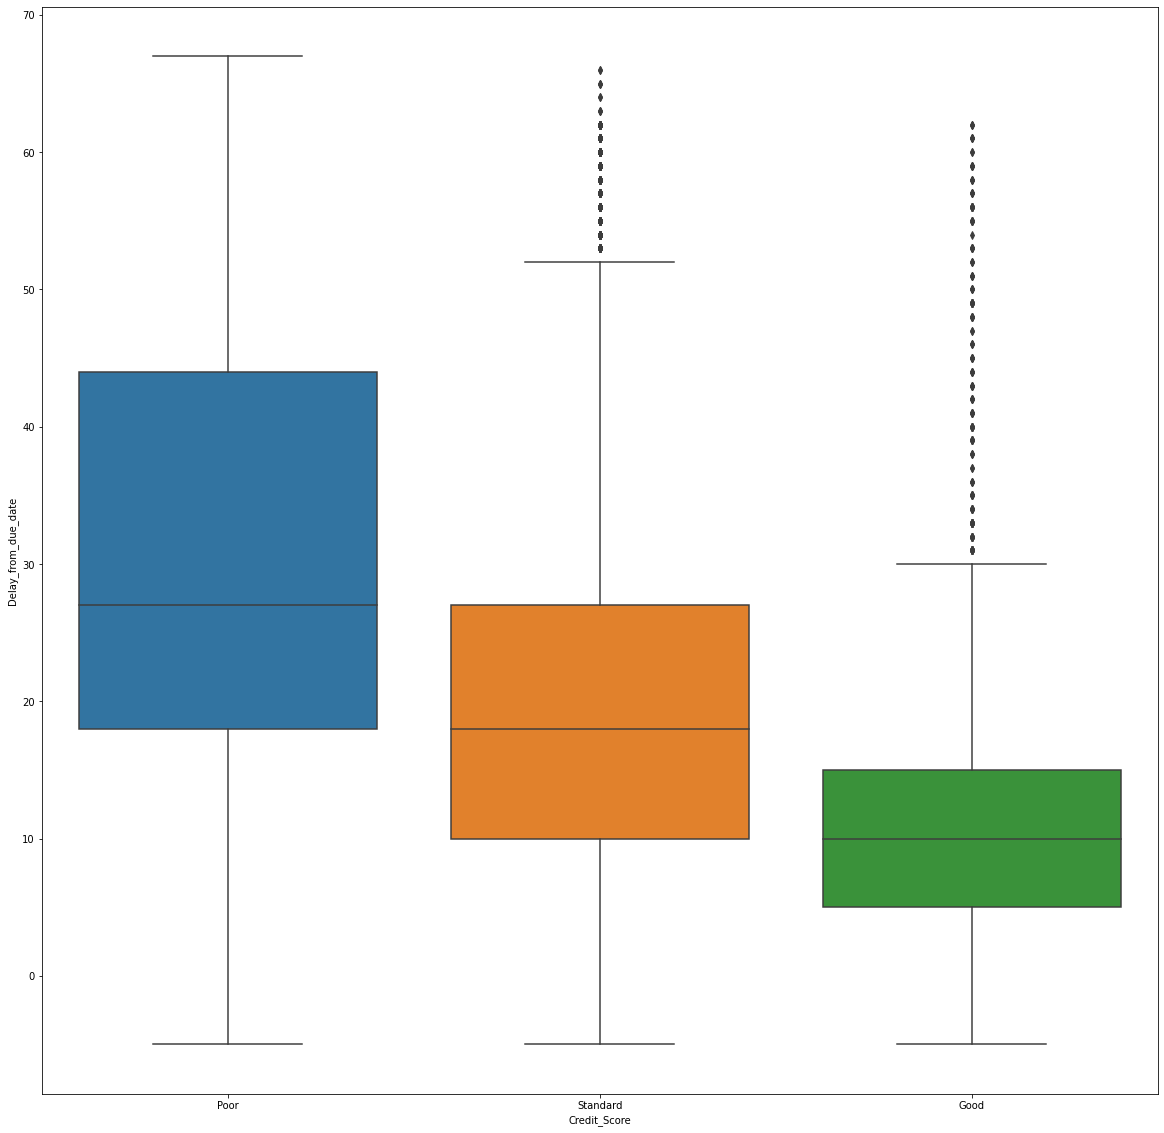

In [18]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = df, x = 'Credit_Score', y = 'Delay_from_due_date')
plt.show()


 - People with delayed payments between 5 to 15 have good credit score.
 - People with delayed payments between 10 to 26 have standard credit score.
 - People with delayed payments between 15 to 45 have poor credit score.

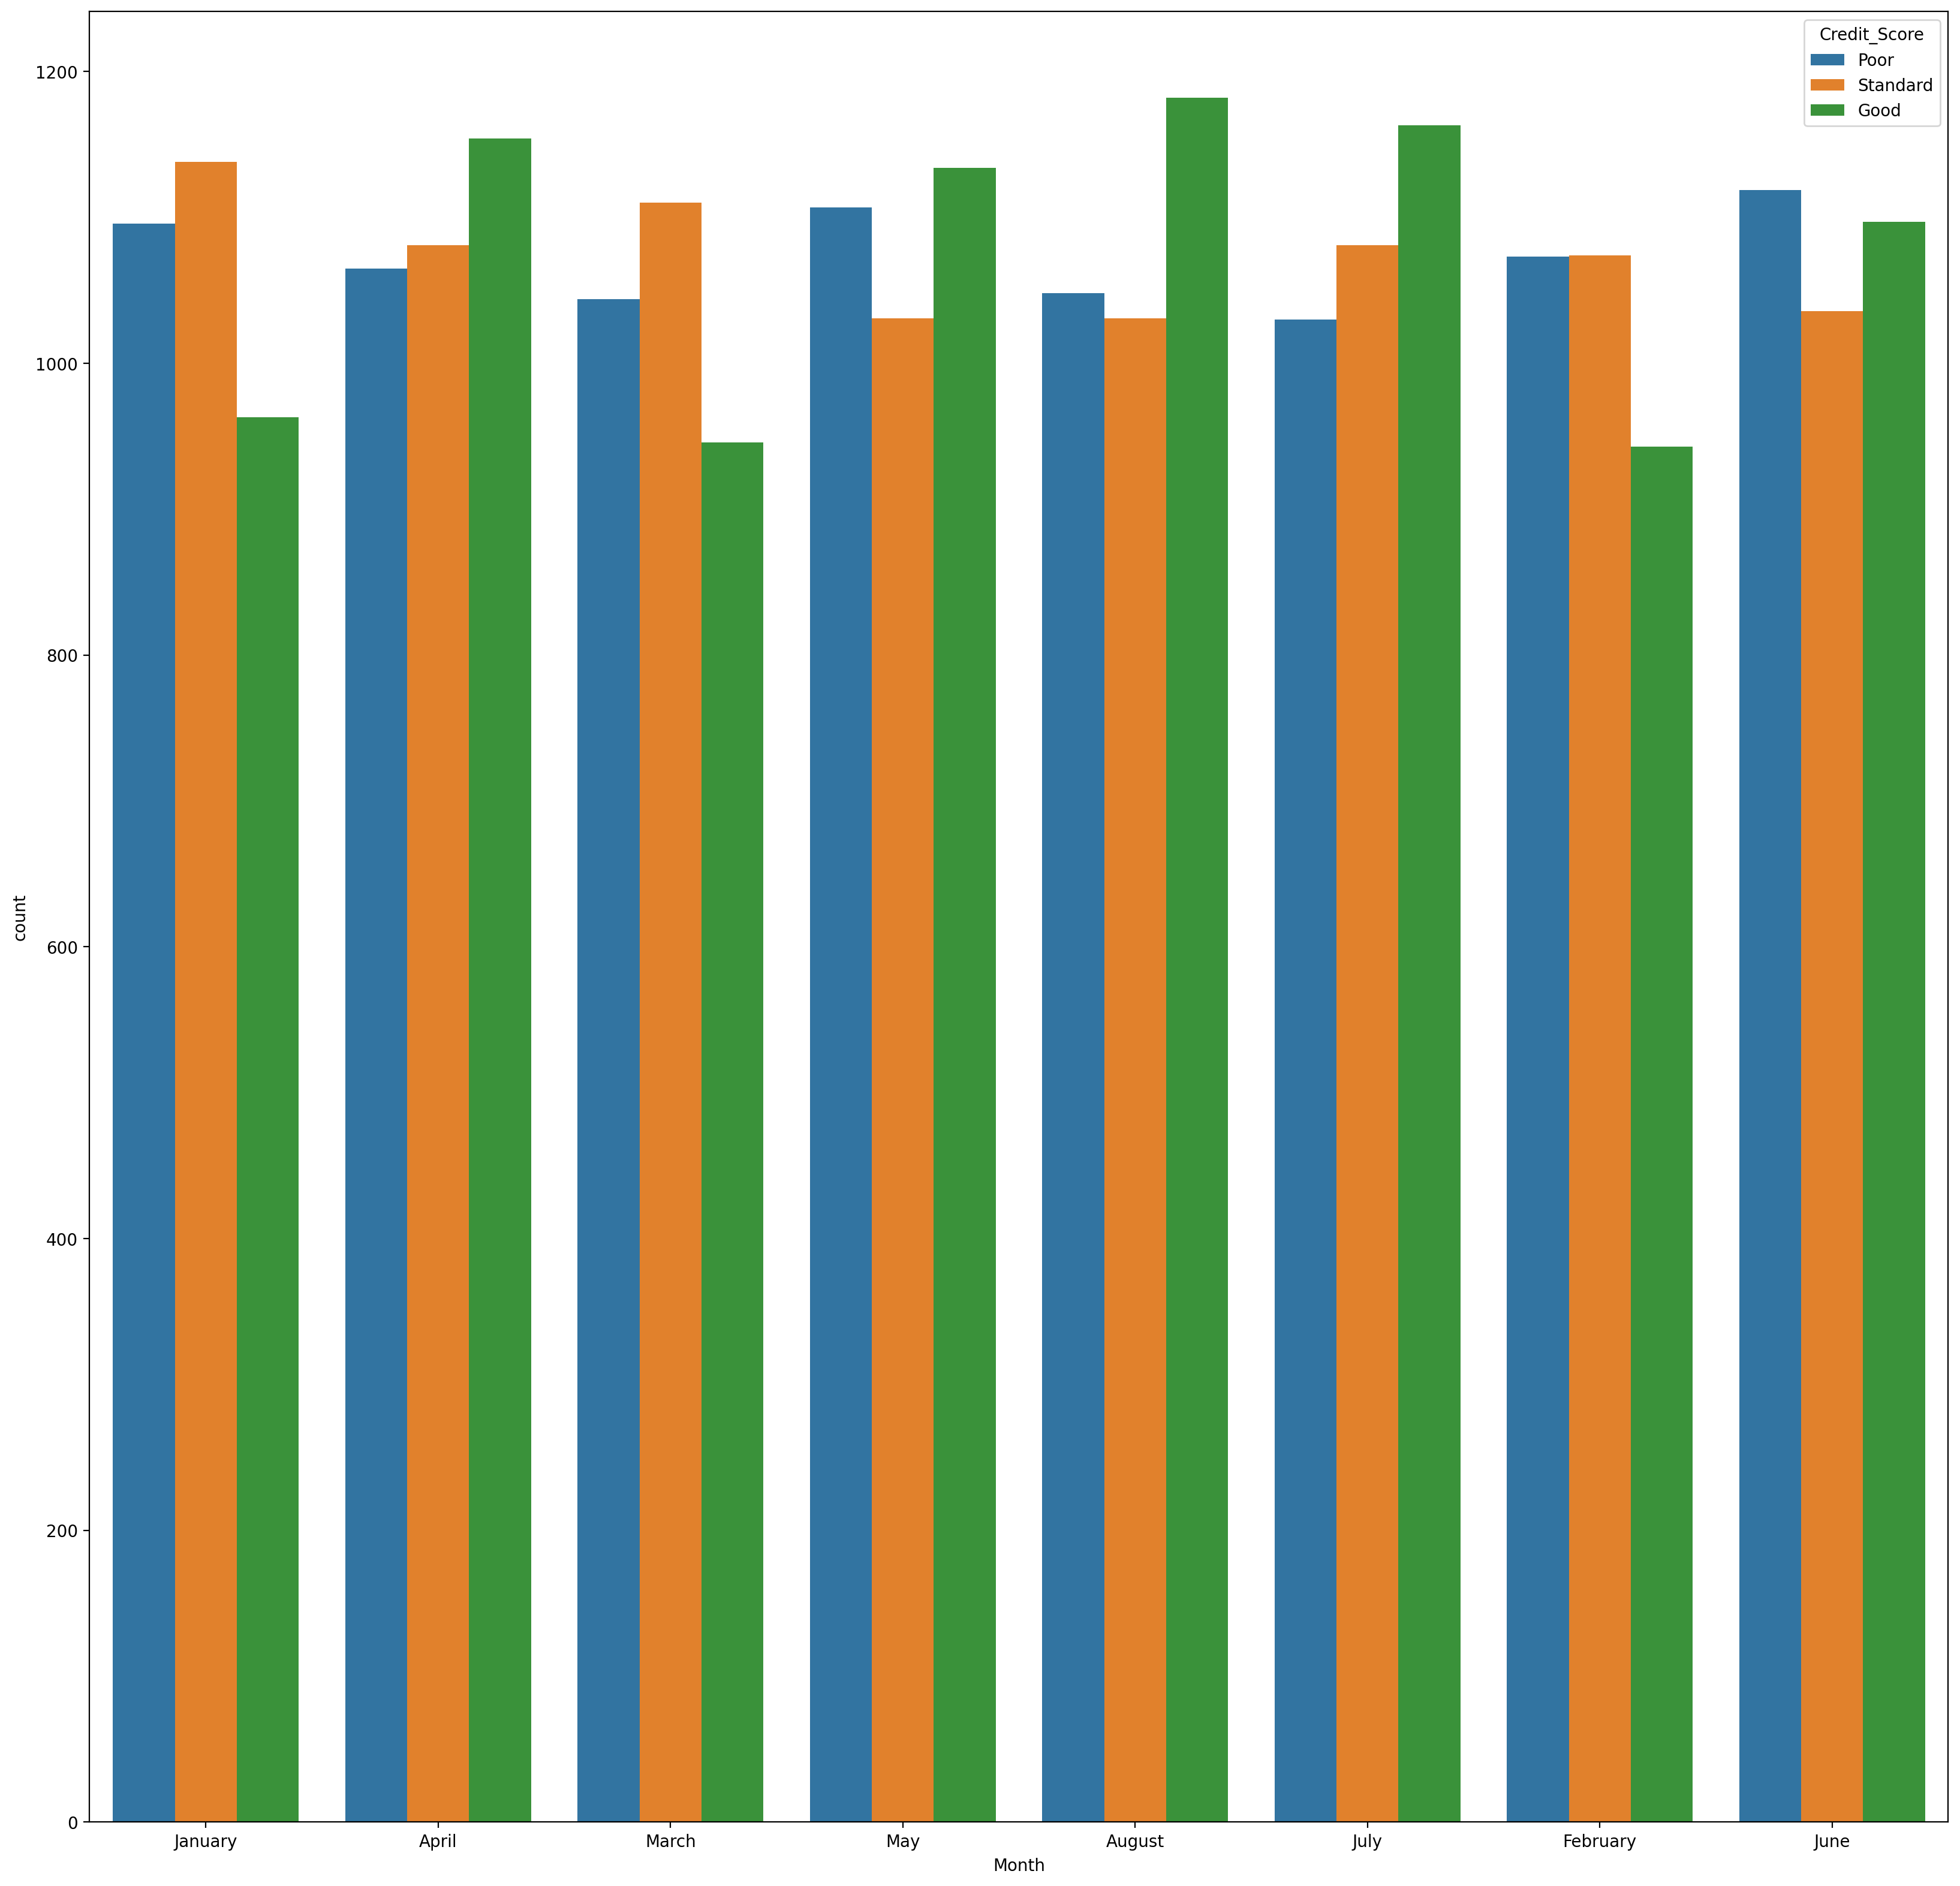

In [19]:
plt.figure(figsize = (20, 20), dpi = 200)
sns.countplot(data = df, x = 'Month', hue = 'Credit_Score')
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='count'>

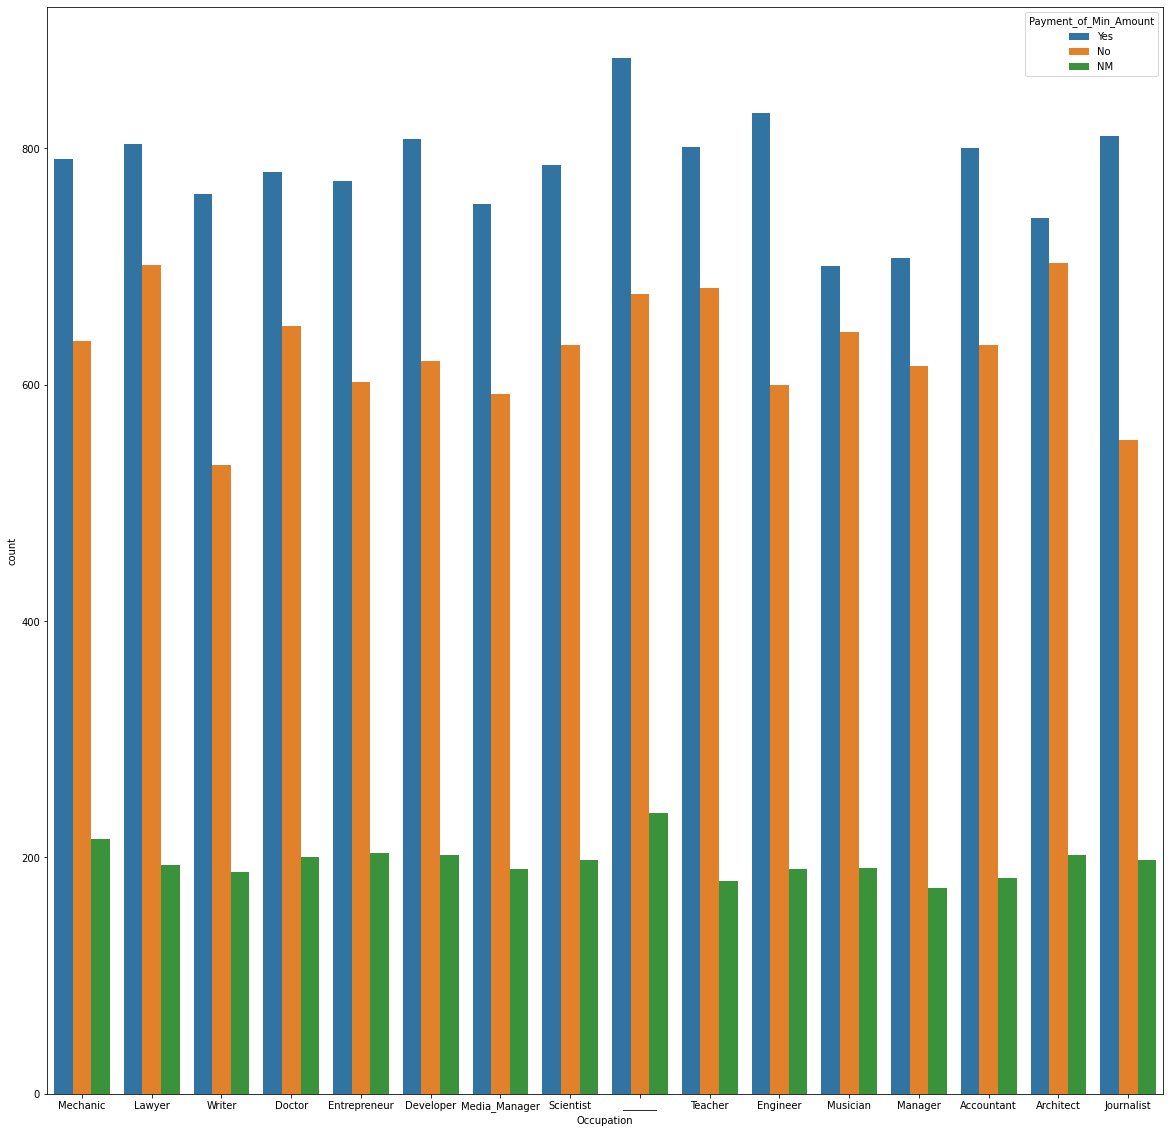

In [20]:
plt.figure(figsize = (20, 20))
sns.countplot(data = df, x = 'Occupation', hue = 'Payment_of_Min_Amount')

- So, people with every occupation have mostly paid their minimum amount which is pretty evident from the previous plot.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25746 entries, 24656 to 34878
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        25746 non-null  object 
 1   Customer_ID               25746 non-null  object 
 2   Month                     25746 non-null  object 
 3   Name                      25746 non-null  object 
 4   Age                       25746 non-null  object 
 5   SSN                       25746 non-null  object 
 6   Occupation                25746 non-null  object 
 7   Annual_Income             25746 non-null  object 
 8   Monthly_Inhand_Salary     25746 non-null  float64
 9   Num_Bank_Accounts         25746 non-null  int64  
 10  Num_Credit_Card           25746 non-null  int64  
 11  Interest_Rate             25746 non-null  int64  
 12  Num_of_Loan               25746 non-null  object 
 13  Type_of_Loan              25746 non-null  object 
 14  De

In [22]:
del df['Name']

In [23]:
del df['SSN']

In [24]:
del df['Customer_ID']

In [25]:
del df['ID']

In [26]:
del df['Month']

In [27]:
def condition(x):
    if x == "Good":
        return 1
    elif x == "Standard":
        return 0
    else:
        return -1

df['Credit_Score'] = df['Credit_Score'].apply(condition)

In [28]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
24656,24_,Mechanic,20196.67,1679.055833,9,9,17,7,"Not Specified, Personal Loan, Credit-Builder L...",51,22,26.96,11.0,_,2971.91,36.028724,5 Years and 7 Months,Yes,66.811004,27.314798347474703,High_spent_Medium_value_payments,323.77978137586473,-1
43475,45,Lawyer,17502.19,1380.515833,7,5,6,5,"Credit-Builder Loan, Student Loan, Credit-Buil...",5,11,11.32,4.0,Standard,251.99,33.290380,13 Years and 6 Months,Yes,52.999514,58.67183240816764,Low_spent_Small_value_payments,316.38023686060694,0
57288,23,Writer,61224.33,4862.027500,4,5,12,1,Home Equity Loan,29,12,12.65,5.0,Standard,707.43,24.283948,16 Years and 8 Months,Yes,38.309810,70.35849413231986,High_spent_Large_value_payments,617.5344455578779,0
28890,22,Doctor,16594.51,1642.875833,9,8,18,8,"Mortgage Loan, Credit-Builder Loan, Home Equit...",15,16,2.54,13.0,Bad,3345.56,27.357150,10 Years and 1 Months,Yes,68.248891,45.1269310750624,High_spent_Small_value_payments,310.9117614286125,-1
94435,52,Entrepreneur,57856.2_,4605.350000,8,7,17,3,"Personal Loan, Student Loan, and Not Specified",16,19,1.02,0.0,Standard,853.8,32.710327,30 Years and 5 Months,No,139.470694,110.52781748009527,High_spent_Medium_value_payments,460.53648862478525,0


In [29]:
df['Credit_Mix'] = df['Credit_Mix'].apply(condition)

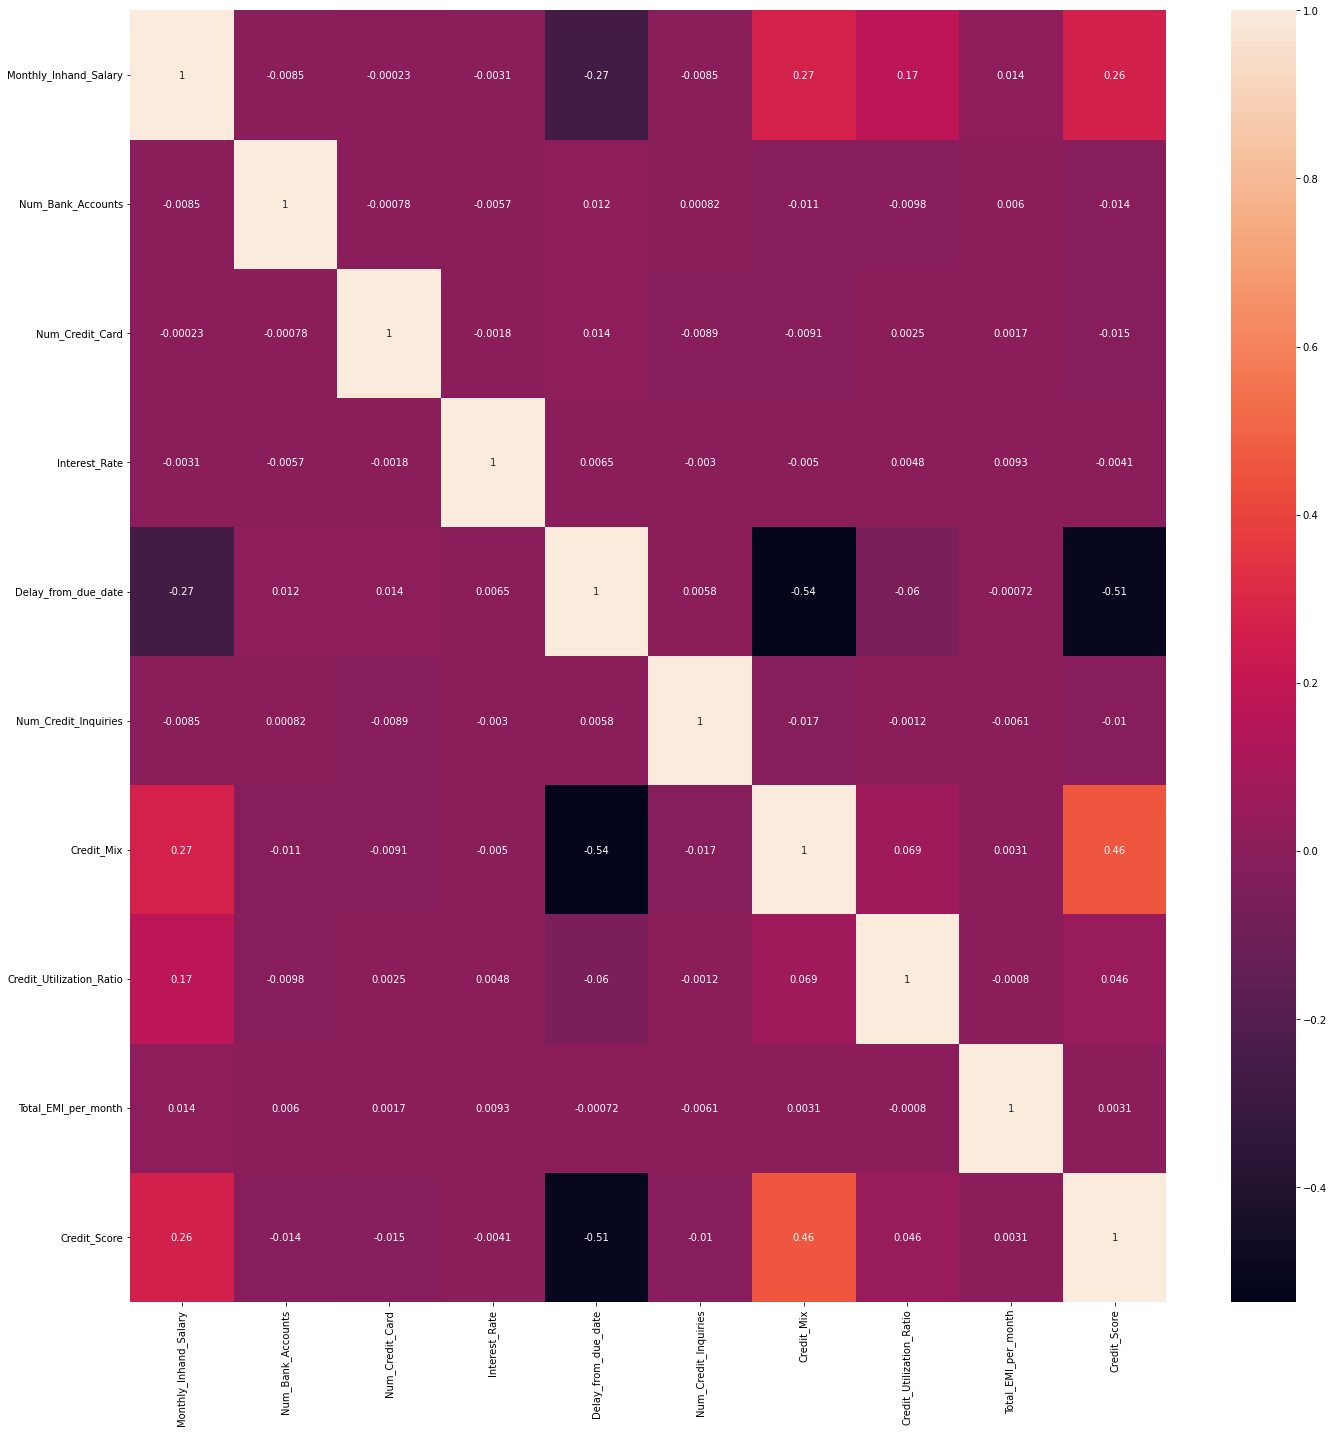

In [30]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)
plt.tight_layout()

In [31]:
def transform_payment(x):
    if x == "Yes":
        return 1
    else:
        return 0
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(transform_payment)

In [32]:
del df['Payment_Behaviour']

In [33]:
del df['Type_of_Loan']

In [34]:
def encode_occ(x):
    if x == "Lawyer":
        return 1
    elif x== "Teacher":
        return 2
    elif x== "Architect":
        return 3
    elif x== "Mechanic":
        return 4
    elif x== "Doctor":
        return 5
    elif x== "Developer":
        return 6
    elif x== "Engineer":
        return 7
    elif x== "Scientist":
        return 8
    elif x== "Accountant":
        return 9
    elif x== "Entrepreneur":
        return 11
    elif x== "Journalist":
        return 12
    elif x== "Musician":
        return 13
    elif x== "Media_Manager":
        return 14
    elif x== "Manager":
        return 15
    elif x== "Writer":
        return 16
    else:
        return 0
df['Occupation'] = df['Occupation'].apply(encode_occ)

In [35]:
y = df['Credit_Score']
del df['Credit_Score']

In [36]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('_', '')
    else:
        df[col] = df[col]

In [37]:
del df['Credit_History_Age']

In [38]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
24656,24,4,20196.67,1679.055833,9,9,17,7,51,22,26.96,11.0,-1,2971.91,36.028724,1,66.811004,27.314798347474703,323.77978137586473
43475,45,1,17502.19,1380.515833,7,5,6,5,5,11,11.32,4.0,0,251.99,33.290380,1,52.999514,58.67183240816764,316.38023686060694
57288,23,16,61224.33,4862.027500,4,5,12,1,29,12,12.65,5.0,0,707.43,24.283948,1,38.309810,70.35849413231986,617.5344455578779
28890,22,5,16594.51,1642.875833,9,8,18,8,15,16,2.54,13.0,-1,3345.56,27.357150,1,68.248891,45.1269310750624,310.9117614286125
94435,52,11,57856.2,4605.350000,8,7,17,3,16,19,1.02,0.0,0,853.8,32.710327,0,139.470694,110.52781748009527,460.53648862478525


In [39]:
df.dtypes

Age                          object
Occupation                    int64
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Monthly_Balance              object
dtype: object

In [40]:
df['Age'] = df['Age'].astype(int)

In [41]:
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

In [42]:
del df['Changed_Credit_Limit']

In [43]:
# Calculate the mean of the 'Monthly_Balance' column
mean_balance = df['Monthly_Balance'].mean()

# Replace missing values with the mean
df['Monthly_Balance'].fillna(mean_balance, inplace=True)

In [44]:
df.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_df = sc.fit_transform(df)
std_df1 = sc.fit_transform(df.head(1000))

In [46]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity = 50)
tsne_data = tsne.fit_transform(std_df1)

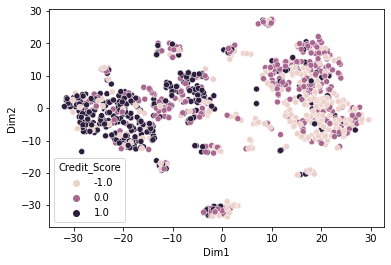

In [47]:
red_df = np.column_stack((tsne_data, y.head(1000)))
red_df = pd.DataFrame(red_df, columns = ('Dim1', 'Dim2', 'Credit_Score'))
sns.scatterplot(data = red_df, x = "Dim1", y = "Dim2", hue = "Credit_Score")
plt.show()

In [48]:
std_df.shape

(25746, 18)

In [49]:
y.shape

(25746,)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(std_df,y,
                                   random_state=104, 
                                   test_size=0.25)

**GaussianNB**

In [51]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

GaussianNB()

In [52]:
# Predict the class labels for the testing data
y_pred = clf.predict(X_test)

In [53]:
# Evaluate the accuracy of the classifier
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4012738853503185


In [54]:
from sklearn.metrics import classification_report

# assuming y_true and y_pred are the true and predicted labels respectively
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.36      0.93      0.52      2150
           0       0.37      0.03      0.05      2173
           1       0.69      0.24      0.36      2114

    accuracy                           0.40      6437
   macro avg       0.48      0.40      0.31      6437
weighted avg       0.47      0.40      0.31      6437



**kNN**

In [55]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training data
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
# Use the trained classifier to predict the classes of the test data
y_pred = clf.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6032313189373932


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.58      0.68      0.63      2150
           0       0.55      0.45      0.49      2173
           1       0.68      0.68      0.68      2114

    accuracy                           0.60      6437
   macro avg       0.60      0.60      0.60      6437
weighted avg       0.60      0.60      0.60      6437



**RandomForest**

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier using the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [60]:
# Use the trained classifier to predict the classes of the test data
y_pred = clf.predict(X_test)

In [61]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7528351716638185


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.77      0.82      0.80      2150
           0       0.72      0.60      0.65      2173
           1       0.76      0.84      0.80      2114

    accuracy                           0.75      6437
   macro avg       0.75      0.75      0.75      6437
weighted avg       0.75      0.75      0.75      6437



In [63]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [09:42<00:00, 20.09s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.75               0.75    None      0.75   
ExtraTreesClassifier               0.74               0.74    None      0.73   
LGBMClassifier                     0.72               0.72    None      0.72   
BaggingClassifier                  0.72               0.72    None      0.72   
SVC                                0.68               0.68    None      0.67   
AdaBoostClassifier                 0.68               0.68    None      0.68   
NuSVC                              0.67               0.68    None      0.67   
DecisionTreeClassifier             0.65               0.65    None      0.65   
BernoulliNB                        0.64               0.64    None      0.62   
LinearSVC                          0.63               0.63    None      0.61   
CalibratedClassifierCV             0.63 